In [141]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import where as IF
import scipy.stats as stats

#### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [3]:
claims= pd.read_csv('E:/BA/Python/1. Python Basic Exercises_For_Submission/5. Pandas Case Study 3 - Insurance Claims Case Study/5. Pandas Case Study 3 - Insurance Claims Case Study/claims.csv')
cust_demographics= pd.read_csv('E:/BA/Python/1. Python Basic Exercises_For_Submission/5. Pandas Case Study 3 - Insurance Claims Case Study/5. Pandas Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')


In [152]:
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [153]:
cust_demographics.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [154]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
claim_id               1100 non-null int64
customer_id            1100 non-null int64
incident_cause         1100 non-null object
claim_date             1100 non-null object
claim_area             1100 non-null object
police_report          1100 non-null object
claim_type             1100 non-null object
claim_amount           1035 non-null object
total_policy_claims    1090 non-null float64
fraudulent             1100 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [10]:
claims.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [155]:
cust_demographics.isnull().sum()

CUST_ID        0
gender         0
DateOfBirth    0
State          0
Contact        0
Segment        0
dtype: int64

In [156]:
cust_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
CUST_ID        1085 non-null int64
gender         1085 non-null object
DateOfBirth    1085 non-null object
State          1085 non-null object
Contact        1085 non-null object
Segment        1085 non-null object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [157]:
claims.shape

(1100, 10)

In [158]:
cust_demographics.shape

(1085, 6)

In [180]:
cust_data = pd.merge(right = claims,left = cust_demographics,right_on = 'customer_id',left_on='CUST_ID',how='left')
cust_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [181]:
cust_data.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
customer_id             7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
dtype: int64

In [182]:
cust_data.drop(columns=["customer_id"],inplace=True)
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1091
Data columns (total 15 columns):
CUST_ID                1092 non-null int64
gender                 1092 non-null object
DateOfBirth            1092 non-null object
State                  1092 non-null object
Contact                1092 non-null object
Segment                1092 non-null object
claim_id               1085 non-null float64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null object
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
dtypes: float64(2), int64(1), object(12)
memory usage: 136.5+ KB


####  2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [183]:
cust_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [184]:
cust_data['DateOfBirth'] = pd.to_datetime(cust_data['DateOfBirth'] , format ="%d-%b-%y")


In [185]:
cust_data['claim_date'] = pd.to_datetime(cust_data['claim_date'], format="%m/%d/%Y")

In [186]:
cust_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No


#### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [187]:
cust_data['claim_amount'] =cust_data['claim_amount'].str.replace('$', '')
cust_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980,3.0,No


In [188]:
cust_data['claim_amount'] = pd.to_numeric(cust_data.claim_amount,downcast='float')
cust_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No


### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [189]:
cust_data['alert'] = IF(cust_data.police_report == "No", 0 ,
                         IF(cust_data.police_report == "Yes", 1, np.nan))
cust_data.head(1)


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0


#### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

#### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [192]:
cat_val = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent","alert"]
con_val = ["claim_amount",'total_policy_claims']

In [194]:
for col in cat_val:
    cust_data[col] = cust_data[col].fillna(cust_data[col].mode()[0])
cust_data[con_val] = cust_data[con_col].fillna(cust_data[con_val].mean())
cust_data.head()



,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0.0
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0.0
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0.0


#### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [196]:
cust_data['AGE'] = (cust_data['claim_date']-cust_data['DateOfBirth']).astype('<m8[Y]')

In [197]:
cust_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert,AGE
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0,38.0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0.0,48.0


In [199]:
cust_data['Age_grp'] = IF(cust_data.AGE < 18, "Children",
                        IF(cust_data.AGE< 30, "Youth",
                         IF(cust_data.AGE< 60, "Adult",
                          IF(cust_data.AGE < 100, "Senior", "NaN"
                           
                          )
                         )
                        )
                       )

In [202]:
cust_data.groupby(by = 'Age_grp').count()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert,AGE
Age_grp,,,,,,,,,,,,,,,,,
Adult,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504
Children,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253
NaN,7,7,7,7,7,7,0,7,0,7,0,7,7,7,7,7,0
Youth,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328


#### What is the average amount claimed by the customers from various segments?

In [205]:
cust_data.groupby(by = 'Segment').claim_amount.mean()

Segment
Gold        12828.668945
Platinum    12342.985352
Silver      12210.651367
Name: claim_amount, dtype: float32

#### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [206]:
cust_data.loc[cust_data.claim_date <"2018-09-10",:].groupby('incident_cause').claim_amount.sum().add_prefix("net_")

incident_cause
net_Crime                 7.244484e+05
net_Driver error          3.319952e+06
net_Natural causes        1.314121e+06
net_Other causes          3.724985e+06
net_Other driver error    3.318770e+06
Name: claim_amount, dtype: float32


#### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?


In [207]:
cust_data.loc[(cust_data.incident_cause.str.lower().str.contains('driver') 
             & ((cust_data.State == 'TX') | (cust_data.State == 'DE') | (cust_data.State == 'AK'))),:].groupby(by = 'State').State.count()

State
AK    11
DE    15
TX    10
Name: State, dtype: int64

#### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage onthe pie chart.

In [209]:
pie_chart = cust_data.groupby(by = ['gender','Segment']).claim_amount.sum().reset_index()
f1.head()

,gender,Segment,claim_amount
0,Female,Gold,2122205.750
1,Female,Platinum,2381951.500
2,Female,Silver,1939314.875
3,Male,Gold,2701373.750
4,Male,Platinum,2123238.250


In [210]:
pie_chart= pie_chart.pivot(index ='Segment', columns = 'gender', values = 'claim_amount')
pie_chart

gender,Female,Male
Segment,,
Gold,2122205.750,2701373.75
Platinum,2381951.500,2123238.25
Silver,1939314.875,2346623.75


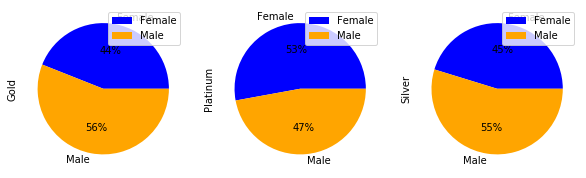

In [214]:
pie_chart.T.plot(kind='pie',
            colors=['blue', 'orange'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            figsize=(10,10))
            
plt.show()

#### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart


In [216]:
bar_chart =cust_data.loc[(cust_data.incident_cause.str.lower().str.contains("driver"))].groupby(by = "gender")[["gender"]].count().add_prefix("CountOf_").reset_index()
bar_chart

,gender,CountOf_gender
0,Female,222
1,Male,284


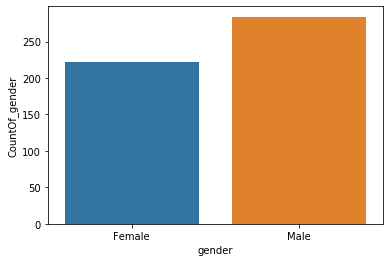

In [217]:
sns.barplot(x = "gender", y = "CountOf_gender", data = bar_chart )
plt.show()

#### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [218]:
fraud_claim=cust_data[cust_data.fraudulent=='Yes']
fraud_claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert,AGE,Age_grp
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0,33.0,Adult
8,21831191,Male,1977-05-17,NH,419-712-8513,Gold,24050443.0,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,0.0,40.0,Adult
13,33507197,Female,2066-09-09,RI,165-519-4583,Gold,63246959.0,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,0.0,-50.0,Children
14,99103685,Female,1985-12-30,KY,764-439-9856,Gold,74165873.0,Other driver error,2018-01-13,Home,No,Material only,1495.0,1.0,Yes,0.0,32.0,Adult
20,1407979,Male,1987-03-15,RI,165-217-1648,Silver,12548447.0,Driver error,2018-06-03,Auto,Unknown,Material only,3208.5,1.0,Yes,0.0,31.0,Adult


In [219]:
fraud_claim1 = fraud_claim.groupby(['Age_grp','fraudulent']).fraudulent.count()
fraud_claim1

Age_grp   fraudulent
Adult     Yes           113
Children  Yes            61
Youth     Yes            73
Name: fraudulent, dtype: int64

In [220]:
fraud_claim1= fraud_claim1.unstack(level=0)
fraud_claim1

Age_grp,Adult,Children,Youth
fraudulent,,,
Yes,113,61,73


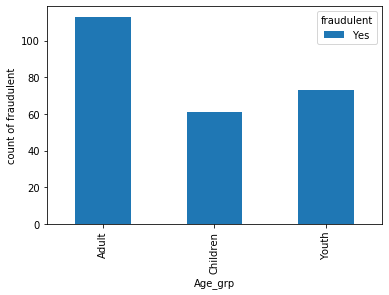

In [224]:
fraud_claim1.T.plot(kind="bar")
plt.ylabel("count of fraudulent")
plt.show()

#### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in achronological order not alphabetical order.

#### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [228]:
avg_claim=cust_data.groupby(['fraudulent','Age_grp','gender']).claim_amount.sum()
avg_claim

fraudulent  Age_grp   gender
No          Adult     Female    2.270058e+06
                      Male      2.570390e+06
            Children  Female    1.105199e+06
                      Male      1.216813e+06
            NaN       Female    6.233841e+04
                      Male      2.493536e+04
            Youth     Female    1.610748e+06
                      Male      1.536979e+06
Yes         Adult     Female    8.961591e+05
                      Male      9.930548e+05
            Children  Female    2.254115e+05
                      Male      4.555035e+05
            Youth     Female    2.735572e+05
                      Male      3.735595e+05
Name: claim_amount, dtype: float32

In [229]:
avg_claim=avg_claim.unstack(level = 0)


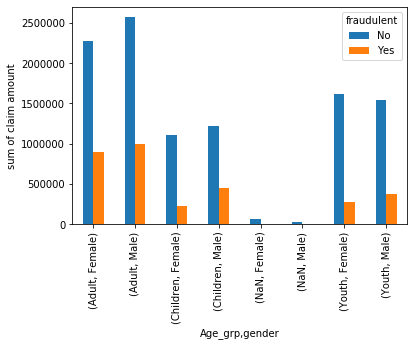

In [231]:
avg_claim.plot(kind="bar")
plt.ylabel("sum of claim amount")
plt.show()


#### 16. Is there any similarity in the amount claimed by males and females?

## ANOVA Test

In [232]:
cust_data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [233]:
s1 = cust_data.loc[ cust_data.gender == 'Female', 'claim_amount']
s2 = cust_data.loc[ cust_data.gender == 'Male', 'claim_amount']

In [241]:
print('mean s1:' , s1.mean(),'mean s2:' , s2.mean(),'mean s3:' )

mean s1: 12066.4248046875 mean s2: 12851.6708984375 mean s3:


In [242]:
print('var s1:' , s1.var(),'var s2:' , s2.var(),'var s3:')

var s1: 170949216.0 var s2: 183668400.0 var s3:


In [243]:
stats.f_oneway(s1,s2)

F_onewayResult(statistic=0.9481899495226607, pvalue=0.33039650024943534)

#### 17. Is there any relationship between age category and segment?

### Chi-sq test

H0= No relationship
ha= relationship

CI: 95%, p: 0.05

In [238]:
obs =pd.crosstab(cust_data.Age_grp,cust_data.Segment)
stats.chi2_contingency(obs)

(3.5873255140811104,
 0.7323174951226474,
 6,
 array([[173.53846154, 168.46153846, 162.        ],
        [ 87.11355311,  84.56501832,  81.32142857],
        [  2.41025641,   2.33974359,   2.25      ],
        [112.93772894, 109.63369963, 105.42857143]]))

#### 18. The current year has shown a significant rise in claim amounts a compared to 2016-17 fiscal average which was $10,000.

### t-test

In [239]:
stats.ttest_1samp( cust_data.claim_amount, 10000 )

Ttest_1sampResult(statistic=6.121728961173115, pvalue=1.2892711886648314e-09)

####  19. Is there any difference between age groups and insurance claims?

#### ANOVA Test

In [240]:
cust_data.Age_grp.unique()

NameError: name 'df360' is not defined

In [246]:
s1= cust_data.loc[ cust_data.Age_grp == 'Adult', 'total_policy_claims']
s2= cust_data.loc[ cust_data.Age_grp == 'Youth', 'total_policy_claims']
s3= cust_data.loc[ cust_data.Age_grp == 'Children','total_policy_claims']

In [247]:
print('mean s1:' , s1.mean(),'mean s2:' , s2.mean(),'mean s3:' )

mean s1: 1.591140642303433 mean s2: 1.6377254679523539 mean s3:


In [248]:
print('var s1:' , s1.var(),'var s2:' , s2.var(),'var s3:' , s3.var())

var s1: 1.1860860635461008 var s2: 1.6064022202587511 var s3: 1.144764541911767


In [249]:
stats.f_oneway(s1, s2, s3)

F_onewayResult(statistic=0.860073717678402, pvalue=0.4234199616851888)

#### 20. Is there any relationship between total number of policy claims and the
claimed amount?

#### Pearson Cofficient test

In [250]:
stats.pearsonr( cust_data.total_policy_claims, cust_data.claim_amount)

(-0.01744856243507439, 0.5646296407465522)

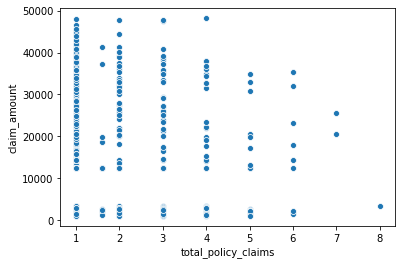

In [251]:
sns.scatterplot( cust_data.total_policy_claims,cust_data.claim_amount)
plt.show()